### Prepare GTSRB train and test DataLoaders for training and testing

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from utils.gtsrb_dataset import GTSRBDataset
from models.tsr_cnn import TSRNet
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm 
import random
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Datasets & loaders
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.RandomRotation(15),
    transforms.RandomAffine(0, translate=(0.1,0.1)),
    transforms.ColorJitter(0.2,0.2,0.2),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


train_dataset = GTSRBDataset(csv_file="./data/Train.csv", root_dir="./data/", transform=transform_train)
test_dataset  = GTSRBDataset(csv_file="./data/Test.csv",  root_dir="./data/", transform=transform_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'Could not load this library: /data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/image.so'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(



 Saved original images grid at: results/eval_samples/original_images.png


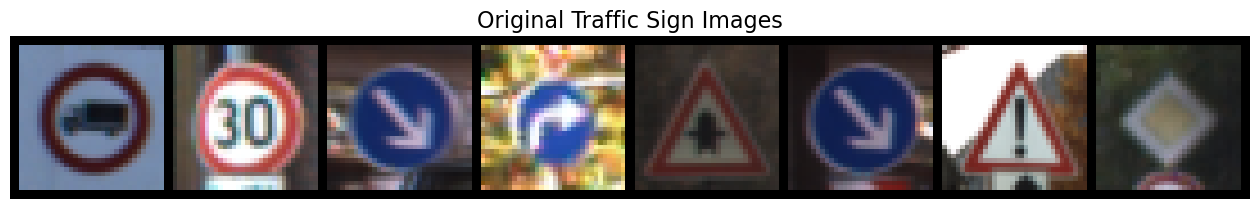

In [22]:

from torchvision.utils import save_image, make_grid

save_dir="results/eval_samples"
os.makedirs(save_dir, exist_ok=True)

imgs, _ = next(iter(test_loader))
imgs = imgs.to(device)[:8]

imgs_vis = (imgs + 1) / 2

save_path = os.path.join(save_dir, "original_images.png")
save_image(imgs_vis, save_path, nrow=8)
print(f"\n Saved original images grid at: {save_path}")

grid_img = make_grid(imgs_vis, nrow=8)
plt.figure(figsize=(16, 4))
plt.imshow(grid_img.permute(1, 2, 0).cpu())
plt.axis("off")
plt.title("Original Traffic Sign Images", fontsize=16)
plt.show()


### Train CNN-based traffic sign recognition model on the GTSRB dataset 

In [ ]:
from utils.train_tsr import train_tsr
from models.tsr_cnn import TSRNet
from torch.utils.data import DataLoader
from torchvision import transforms
from utils.gtsrb_dataset import GTSRBDataset

# Model
model = TSRNet(num_classes=43).to(device)

# Train
model, best_acc = train_tsr(model, train_loader, test_loader, device, num_epochs=70,ckpt_dir="results/checkpoints/tsr")


Epoch 1/50:   0%|          | 3/613 [00:00<00:27, 22.00it/s]

Epoch 1/50: 100%|██████████| 613/613 [00:23<00:00, 26.11it/s]


Epoch [1/50] Loss: 3.1365 | Train Acc: 13.20%
 Test Accuracy: 18.78%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 2/50: 100%|██████████| 613/613 [00:25<00:00, 24.35it/s]


Epoch [2/50] Loss: 2.7507 | Train Acc: 20.29%
 Test Accuracy: 27.84%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 3/50: 100%|██████████| 613/613 [00:21<00:00, 27.89it/s]


Epoch [3/50] Loss: 2.4280 | Train Acc: 26.34%
 Test Accuracy: 37.96%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 4/50: 100%|██████████| 613/613 [00:22<00:00, 27.29it/s]


Epoch [4/50] Loss: 2.1675 | Train Acc: 32.01%
 Test Accuracy: 41.97%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 5/50: 100%|██████████| 613/613 [00:22<00:00, 27.74it/s]


Epoch [5/50] Loss: 1.9740 | Train Acc: 36.14%
 Test Accuracy: 43.08%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 6/50: 100%|██████████| 613/613 [00:21<00:00, 28.62it/s]


Epoch [6/50] Loss: 1.8255 | Train Acc: 39.59%
 Test Accuracy: 45.16%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 7/50: 100%|██████████| 613/613 [00:21<00:00, 28.71it/s]


Epoch [7/50] Loss: 1.7187 | Train Acc: 42.25%
 Test Accuracy: 47.43%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 8/50: 100%|██████████| 613/613 [00:21<00:00, 28.96it/s]


Epoch [8/50] Loss: 1.6360 | Train Acc: 44.75%
 Test Accuracy: 48.99%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 9/50: 100%|██████████| 613/613 [00:23<00:00, 25.83it/s]


Epoch [9/50] Loss: 1.5613 | Train Acc: 46.63%
 Test Accuracy: 53.78%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 10/50: 100%|██████████| 613/613 [00:22<00:00, 27.78it/s]


Epoch [10/50] Loss: 1.4930 | Train Acc: 49.03%
 Test Accuracy: 55.72%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 11/50: 100%|██████████| 613/613 [00:23<00:00, 26.15it/s]


Epoch [11/50] Loss: 1.4160 | Train Acc: 51.77%
 Test Accuracy: 60.93%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 12/50: 100%|██████████| 613/613 [00:26<00:00, 22.99it/s]


Epoch [12/50] Loss: 1.3514 | Train Acc: 53.94%
 Test Accuracy: 63.45%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 13/50: 100%|██████████| 613/613 [00:25<00:00, 24.10it/s]


Epoch [13/50] Loss: 1.2934 | Train Acc: 56.19%
 Test Accuracy: 66.86%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 14/50: 100%|██████████| 613/613 [00:24<00:00, 24.60it/s]


Epoch [14/50] Loss: 1.2138 | Train Acc: 58.89%
 Test Accuracy: 66.96%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 15/50: 100%|██████████| 613/613 [00:24<00:00, 24.97it/s]


Epoch [15/50] Loss: 1.1578 | Train Acc: 60.79%
 Test Accuracy: 72.22%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 16/50: 100%|██████████| 613/613 [00:26<00:00, 23.17it/s]


Epoch [16/50] Loss: 1.0999 | Train Acc: 62.93%
 Test Accuracy: 75.27%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 17/50: 100%|██████████| 613/613 [00:26<00:00, 22.74it/s]


Epoch [17/50] Loss: 1.0489 | Train Acc: 64.66%
 Test Accuracy: 76.91%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 18/50: 100%|██████████| 613/613 [00:25<00:00, 23.58it/s]


Epoch [18/50] Loss: 0.9936 | Train Acc: 66.61%
 Test Accuracy: 77.92%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 19/50: 100%|██████████| 613/613 [00:26<00:00, 23.43it/s]


Epoch [19/50] Loss: 0.9566 | Train Acc: 67.73%
 Test Accuracy: 79.42%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 20/50: 100%|██████████| 613/613 [00:26<00:00, 23.52it/s]


Epoch [20/50] Loss: 0.9195 | Train Acc: 69.17%
 Test Accuracy: 80.41%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 21/50: 100%|██████████| 613/613 [00:26<00:00, 23.39it/s]


Epoch [21/50] Loss: 0.8890 | Train Acc: 69.93%
 Test Accuracy: 82.04%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 22/50: 100%|██████████| 613/613 [00:26<00:00, 23.43it/s]


Epoch [22/50] Loss: 0.8548 | Train Acc: 71.32%
 Test Accuracy: 83.29%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 23/50: 100%|██████████| 613/613 [00:23<00:00, 26.48it/s]


Epoch [23/50] Loss: 0.8307 | Train Acc: 72.09%
 Test Accuracy: 84.13%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 24/50: 100%|██████████| 613/613 [00:26<00:00, 23.57it/s]


Epoch [24/50] Loss: 0.8017 | Train Acc: 73.18%
 Test Accuracy: 84.99%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 25/50: 100%|██████████| 613/613 [00:26<00:00, 23.49it/s]


Epoch [25/50] Loss: 0.7795 | Train Acc: 73.93%
 Test Accuracy: 84.82%


Epoch 26/50: 100%|██████████| 613/613 [00:25<00:00, 23.99it/s]


Epoch [26/50] Loss: 0.7466 | Train Acc: 74.87%
 Test Accuracy: 85.93%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 27/50: 100%|██████████| 613/613 [00:24<00:00, 25.46it/s]


Epoch [27/50] Loss: 0.7477 | Train Acc: 74.84%
 Test Accuracy: 87.16%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 28/50: 100%|██████████| 613/613 [00:23<00:00, 25.65it/s]


Epoch [28/50] Loss: 0.7155 | Train Acc: 76.19%
 Test Accuracy: 87.32%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 29/50: 100%|██████████| 613/613 [00:26<00:00, 23.49it/s]


Epoch [29/50] Loss: 0.7009 | Train Acc: 76.87%
 Test Accuracy: 88.18%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 30/50: 100%|██████████| 613/613 [00:27<00:00, 22.64it/s]


Epoch [30/50] Loss: 0.6920 | Train Acc: 77.23%
 Test Accuracy: 88.69%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 31/50: 100%|██████████| 613/613 [00:28<00:00, 21.84it/s]


Epoch [31/50] Loss: 0.6735 | Train Acc: 77.75%
 Test Accuracy: 88.99%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 32/50: 100%|██████████| 613/613 [00:25<00:00, 23.61it/s]


Epoch [32/50] Loss: 0.6582 | Train Acc: 78.20%
 Test Accuracy: 89.31%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 33/50: 100%|██████████| 613/613 [00:24<00:00, 24.67it/s]


Epoch [33/50] Loss: 0.6525 | Train Acc: 78.58%
 Test Accuracy: 89.33%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 34/50: 100%|██████████| 613/613 [00:26<00:00, 23.23it/s]


Epoch [34/50] Loss: 0.6327 | Train Acc: 79.26%
 Test Accuracy: 89.56%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 35/50: 100%|██████████| 613/613 [00:25<00:00, 23.66it/s]


Epoch [35/50] Loss: 0.6213 | Train Acc: 79.70%
 Test Accuracy: 90.51%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 36/50: 100%|██████████| 613/613 [00:27<00:00, 22.53it/s]


Epoch [36/50] Loss: 0.6090 | Train Acc: 79.96%
 Test Accuracy: 90.92%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 37/50: 100%|██████████| 613/613 [00:23<00:00, 25.64it/s]


Epoch [37/50] Loss: 0.5959 | Train Acc: 80.46%
 Test Accuracy: 91.23%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 38/50: 100%|██████████| 613/613 [00:24<00:00, 25.09it/s]


Epoch [38/50] Loss: 0.5872 | Train Acc: 80.94%
 Test Accuracy: 91.29%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 39/50: 100%|██████████| 613/613 [00:23<00:00, 25.66it/s]


Epoch [39/50] Loss: 0.5724 | Train Acc: 81.13%
 Test Accuracy: 91.89%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 40/50: 100%|██████████| 613/613 [00:21<00:00, 27.89it/s]


Epoch [40/50] Loss: 0.5635 | Train Acc: 81.51%
 Test Accuracy: 92.15%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 41/50: 100%|██████████| 613/613 [00:22<00:00, 26.85it/s]


Epoch [41/50] Loss: 0.5606 | Train Acc: 81.64%
 Test Accuracy: 92.43%
Saved best model: results/checkpoints/tsr/tsr_best_model.pth


Epoch 42/50: 100%|██████████| 613/613 [00:21<00:00, 29.11it/s]


Epoch [42/50] Loss: 0.5463 | Train Acc: 82.07%
 Test Accuracy: 91.46%


Epoch 43/50: 100%|██████████| 613/613 [00:20<00:00, 30.61it/s]


Epoch [43/50] Loss: 0.5444 | Train Acc: 82.21%
 Test Accuracy: 91.44%


Epoch 44/50: 100%|██████████| 613/613 [00:23<00:00, 26.17it/s]


Epoch [44/50] Loss: 0.5332 | Train Acc: 82.45%
 Test Accuracy: 92.08%


Epoch 45/50: 100%|██████████| 613/613 [00:21<00:00, 28.00it/s]


Epoch [45/50] Loss: 0.5176 | Train Acc: 83.01%
 Test Accuracy: 91.92%


Epoch 46/50: 100%|██████████| 613/613 [00:20<00:00, 29.86it/s]


Epoch [46/50] Loss: 0.5307 | Train Acc: 82.72%
 Test Accuracy: 92.41%
Early stopping triggered.
Training complete. Best Test Accuracy: 92.43%


### Loads a trained TSRNet, evaluates clean accuracy and robustness to FGSM/PGD and adversarial patch attack.

In [12]:
import importlib
import utils.attacks as attacks
import utils.attack_eval as attack_eval
from models.tsr_cnn import TSRNet
importlib.reload(attacks)
importlib.reload(attack_eval)
from utils.attacks import train_adversarial_patch
from utils.attack_eval import (
    evaluate_clean, evaluate_fgsm, evaluate_pgd, evaluate_patch,
    evaluate_noise, evaluate_salt_pepper, evaluate_blur,
    evaluate_color_jitter, evaluate_affine, evaluate_perspective
)
model = TSRNet(num_classes=43).to(device)
ckpt = torch.load("results/checkpoints/tsr/tsr_best_model.pth", map_location=device)
model.load_state_dict(ckpt['model_state_dict'])
model.eval()

print("\n Evaluating Clean Accuracy...")
clean_acc = evaluate_clean(model, test_loader, device)
print(f" Clean Accuracy: {clean_acc:.2f}%\n")

fgsm_acc, fgsm_asr = evaluate_fgsm(model, test_loader, device, eps=0.03)
print(f"FGSM Attack  -> Accuracy: {fgsm_acc:.2f}% | ASR: {fgsm_asr:.2f}%")

pgd_acc, pgd_asr = evaluate_pgd(model, test_loader, device, eps=0.03, alpha=0.007, iters=20)
print(f"PGD Attack   -> Accuracy: {pgd_acc:.2f}% | ASR: {pgd_asr:.2f}%")

patch = train_adversarial_patch(model, train_loader, device, num_epochs=10, patch_size=0.18, lr=0.05)
patch_res = evaluate_patch(model, test_loader, patch, device, patch_size=0.18)
print(f"Patch Attack -> Clean: {patch_res['clean_acc']:.2f}% | Adv: {patch_res['adv_acc']:.2f}% | ASR: {patch_res['asr']:.2f}%\n")

noise_acc, noise_asr = evaluate_noise(model, test_loader, device, sigma=0.05)
print(f"Gaussian Noise       -> Accuracy: {noise_acc:.2f}% | ASR: {noise_asr:.2f}%")

sp_acc, sp_asr = evaluate_salt_pepper(model, test_loader, device, amount=0.02)
print(f"Salt-and-Pepper Noise -> Accuracy: {sp_acc:.2f}% | ASR: {sp_asr:.2f}%")

blur_acc, blur_asr = evaluate_blur(model, test_loader, device, mode='gaussian', ksize=5)
print(f"Gaussian Blur        -> Accuracy: {blur_acc:.2f}% | ASR: {blur_asr:.2f}%")

motion_acc, motion_asr = evaluate_blur(model, test_loader, device, mode='motion', ksize=9)
print(f"Motion Blur          -> Accuracy: {motion_acc:.2f}% | ASR: {motion_asr:.2f}%")

color_acc, color_asr = evaluate_color_jitter(
    model, test_loader, device,
    brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1
)
print(f"Color Jitter         -> Accuracy: {color_acc:.2f}% | ASR: {color_asr:.2f}%")

affine_acc, affine_asr = evaluate_affine(
    model, test_loader, device,
    degrees=15, translate=(0.1,0.1), scale=(0.9,1.1), shear=10
)
print(f"Affine Transform    -> Accuracy: {affine_acc:.2f}% | ASR: {affine_asr:.2f}%")

persp_acc, persp_asr = evaluate_perspective(model, test_loader, device, distortion_scale=0.5)
print(f"Perspective Distortion -> Accuracy: {persp_acc:.2f}% | ASR: {persp_asr:.2f}%\n")


 Evaluating Clean Accuracy...
 Clean Accuracy: 94.30%

FGSM Attack  -> Accuracy: 43.62% | ASR: 56.24%
PGD Attack   -> Accuracy: 25.34% | ASR: 75.01%
[Patch train] Epoch 1/10, loss: -1.1653
[Patch train] Epoch 10/10, loss: -1.2427
Patch Attack -> Clean: 94.30% | Adv: 65.94% | ASR: 30.95%

Gaussian Noise       -> Accuracy: 77.78% | ASR: 18.07%
Salt-and-Pepper Noise -> Accuracy: 79.00% | ASR: 16.88%
Gaussian Blur        -> Accuracy: 87.74% | ASR: 8.12%
Motion Blur          -> Accuracy: 55.04% | ASR: 42.30%
Color Jitter         -> Accuracy: 91.84% | ASR: 3.31%
Affine Transform    -> Accuracy: 92.40% | ASR: 3.22%
Perspective Distortion -> Accuracy: 68.97% | ASR: 27.61%



### Trains an Autoencoder on GTSRB data, evaluates reconstruction loss.

/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[Epoch 1/20] Train Loss: 21.062956 | Test Loss: 14.146375
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 2/20] Train Loss: 15.506047 | Test Loss: 10.581559
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 3/20] Train Loss: 11.189406 | Test Loss: 7.949594
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 4/20] Train Loss: 9.170273 | Test Loss: 6.928085
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 5/20] Train Loss: 8.190364 | Test Loss: 6.182983
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 6/20] Train Loss: 7.499270 | Test Loss: 5.762316
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 7/20] Train Loss: 6.971534 | Test Loss: 5.439103
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 8/20] Train Loss: 6.634744 | Test Loss: 5.278527
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 9/20] Train Loss: 6.354113 | Test Loss: 5.093031
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 10/20] Train Loss: 6.128703 | Test Loss: 4.853856
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 11/20] Train Loss: 5.914269 | Test Loss: 4.796335
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 12/20] Train Loss: 5.715403 | Test Loss: 4.558506
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 13/20] Train Loss: 5.577579 | Test Loss: 4.464616
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 14/20] Train Loss: 5.439109 | Test Loss: 4.338844
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 15/20] Train Loss: 5.311488 | Test Loss: 4.259109
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 16/20] Train Loss: 5.202699 | Test Loss: 4.165623
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 17/20] Train Loss: 5.082770 | Test Loss: 4.111516
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 18/20] Train Loss: 4.988224 | Test Loss: 4.042877
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 19/20] Train Loss: 4.891393 | Test Loss: 3.994475
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


[Epoch 20/20] Train Loss: 4.830213 | Test Loss: 3.898053
Saved best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


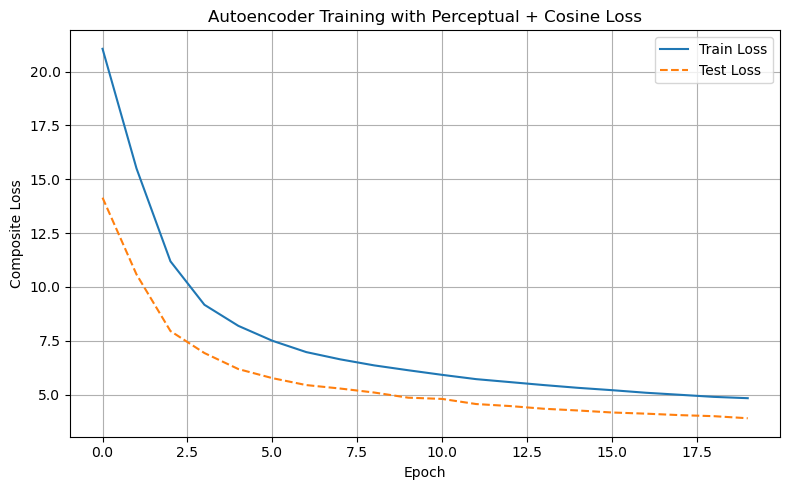


Training finished  | Best test loss: 3.898053
Best checkpoint saved at: results/checkpoints/autoencoder/retrain/autoencoder_best.pth
Best checkpoint: results/checkpoints/autoencoder/retrain/autoencoder_best.pth


In [2]:
import importlib
import utils.train_autoencoder as train_autoencoder_utils
importlib.reload(train_autoencoder_utils)
from utils.train_autoencoder import train_autoencoder
from models.autoencoder import Autoencoder, load_checkpoint
from utils.visualization import save_sample_with_metrics  
from torch.utils.data import DataLoader
from torchvision import transforms


model, best_loss, best_ckpt = train_autoencoder(
    train_loader, test_loader, device,
    latent_dim=512, num_epochs=20, lr=1e-3, ckpt_dir="results/checkpoints/autoencoder/retrain"
)
print("Best checkpoint:", best_ckpt)

Loaded checkpoint from epoch 20
 Metrics on first 8 images:
Mean MSE: 0.0084
Mean PSNR: 26.75 dB
Mean SSIM: 0.9447
Mean LPIPS: 0.1130
Saved reconstruction comparison grid to results/samples/reconstruction_metrics.png


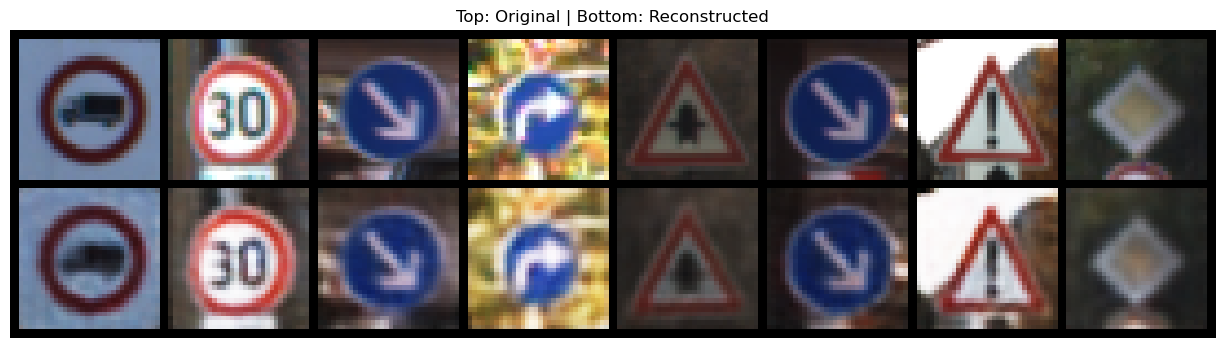

In [15]:
import importlib
import utils.visualization as visualization
importlib.reload(visualization)
from utils.visualization import save_sample_with_metrics
import models.autoencoder as autoencoder
importlib.reload(autoencoder)

from models.autoencoder import Autoencoder, load_checkpoint

model = Autoencoder(latent_dim=512).to(device)
load_checkpoint(model, optimizer=None, filename="results/checkpoints/autoencoder/autoencoder_best.pth", map_location=device)

save_sample_with_metrics(model, test_loader, device, save_path="results/samples/reconstruction_metrics.png", num_images=8)


### Train UNetWatermark + LatentDecoder to embed/recover latent features from images using pretrained Autoencoder

In [8]:
import importlib
import utils.train_unet_watermark as train_unet_watermark
importlib.reload(train_unet_watermark)
from utils.train_unet_watermark import train_unet_watermark
from torchvision import transforms
from torch.utils.data import DataLoader
from utils.gtsrb_dataset import GTSRBDataset

unet, latent_decoder, best_loss = train_unet_watermark(
    train_loader, device,
    autoencoder_ckpt="results/checkpoints/autoencoder/autoencoder_best.pth",
    latent_dim=512,
    num_epochs=50,
    lr=1e-4,
    ckpt_dir="results/checkpoints/unet"
)
print("Finished. Best perceptual loss:", best_loss)

Loaded checkpoint from epoch 20


/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
UNet Epoch 1/50: 100%|██████████| 613/613 [05:51<00:00,  1.74it/s]


[Epoch 1] Avg Total Loss: 48.579566
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 2/50: 100%|██████████| 613/613 [06:11<00:00,  1.65it/s]


[Epoch 2] Avg Total Loss: 27.306419
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 3/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 3] Avg Total Loss: 22.983220
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 4/50: 100%|██████████| 613/613 [07:29<00:00,  1.36it/s]


[Epoch 4] Avg Total Loss: 21.044641
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 5/50: 100%|██████████| 613/613 [07:29<00:00,  1.36it/s]


[Epoch 5] Avg Total Loss: 20.139930
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 6/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 6] Avg Total Loss: 18.735805
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 7/50: 100%|██████████| 613/613 [07:28<00:00,  1.37it/s]


[Epoch 7] Avg Total Loss: 17.537282
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 8/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 8] Avg Total Loss: 18.575788


UNet Epoch 9/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 9] Avg Total Loss: 18.062274


UNet Epoch 10/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 10] Avg Total Loss: 17.661226


UNet Epoch 11/50: 100%|██████████| 613/613 [07:29<00:00,  1.36it/s]


[Epoch 11] Avg Total Loss: 17.669160


UNet Epoch 12/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 12] Avg Total Loss: 17.077545
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 13/50: 100%|██████████| 613/613 [07:38<00:00,  1.34it/s]


[Epoch 13] Avg Total Loss: 17.131372


UNet Epoch 14/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 14] Avg Total Loss: 16.847501
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 15/50: 100%|██████████| 613/613 [07:30<00:00,  1.36it/s]


[Epoch 15] Avg Total Loss: 16.765326
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 16/50: 100%|██████████| 613/613 [07:32<00:00,  1.36it/s]


[Epoch 16] Avg Total Loss: 16.908561


UNet Epoch 17/50: 100%|██████████| 613/613 [07:34<00:00,  1.35it/s]


[Epoch 17] Avg Total Loss: 17.843120


UNet Epoch 18/50: 100%|██████████| 613/613 [07:35<00:00,  1.35it/s]


[Epoch 18] Avg Total Loss: 17.395390


UNet Epoch 19/50: 100%|██████████| 613/613 [07:31<00:00,  1.36it/s]


[Epoch 19] Avg Total Loss: 16.612735
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 20/50: 100%|██████████| 613/613 [08:32<00:00,  1.20it/s]


[Epoch 20] Avg Total Loss: 15.770264
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 21/50: 100%|██████████| 613/613 [09:53<00:00,  1.03it/s]


[Epoch 21] Avg Total Loss: 16.884440


UNet Epoch 22/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 22] Avg Total Loss: 16.570294


UNet Epoch 23/50: 100%|██████████| 613/613 [11:07<00:00,  1.09s/it]


[Epoch 23] Avg Total Loss: 17.426394


UNet Epoch 24/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 24] Avg Total Loss: 16.012129


UNet Epoch 25/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 25] Avg Total Loss: 16.721536


UNet Epoch 26/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 26] Avg Total Loss: 16.662025


UNet Epoch 27/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 27] Avg Total Loss: 16.081751


UNet Epoch 28/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 28] Avg Total Loss: 16.131556


UNet Epoch 29/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 29] Avg Total Loss: 15.527335
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 30/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 30] Avg Total Loss: 16.758968


UNet Epoch 31/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 31] Avg Total Loss: 16.069761


UNet Epoch 32/50: 100%|██████████| 613/613 [11:03<00:00,  1.08s/it]


[Epoch 32] Avg Total Loss: 16.193845


UNet Epoch 33/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 33] Avg Total Loss: 16.261393


UNet Epoch 34/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 34] Avg Total Loss: 17.064214


UNet Epoch 35/50: 100%|██████████| 613/613 [11:09<00:00,  1.09s/it]


[Epoch 35] Avg Total Loss: 17.175044


UNet Epoch 36/50: 100%|██████████| 613/613 [11:07<00:00,  1.09s/it]


[Epoch 36] Avg Total Loss: 16.961463


UNet Epoch 37/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 37] Avg Total Loss: 17.277852


UNet Epoch 38/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 38] Avg Total Loss: 15.319345
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 39/50: 100%|██████████| 613/613 [11:05<00:00,  1.09s/it]


[Epoch 39] Avg Total Loss: 16.395186


UNet Epoch 40/50: 100%|██████████| 613/613 [11:04<00:00,  1.08s/it]


[Epoch 40] Avg Total Loss: 16.191186


UNet Epoch 41/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]


[Epoch 41] Avg Total Loss: 16.296838


UNet Epoch 42/50: 100%|██████████| 613/613 [11:16<00:00,  1.10s/it]


[Epoch 42] Avg Total Loss: 15.879432


UNet Epoch 43/50: 100%|██████████| 613/613 [11:09<00:00,  1.09s/it]


[Epoch 43] Avg Total Loss: 15.141769
Saved best UNet and LatentDecoder checkpoints.


UNet Epoch 44/50: 100%|██████████| 613/613 [09:48<00:00,  1.04it/s]


[Epoch 44] Avg Total Loss: 15.979967


UNet Epoch 45/50: 100%|██████████| 613/613 [05:48<00:00,  1.76it/s]


[Epoch 45] Avg Total Loss: 15.279536


UNet Epoch 46/50: 100%|██████████| 613/613 [05:46<00:00,  1.77it/s]


[Epoch 46] Avg Total Loss: 15.875990


UNet Epoch 47/50: 100%|██████████| 613/613 [05:49<00:00,  1.75it/s]


[Epoch 47] Avg Total Loss: 15.815418


UNet Epoch 48/50: 100%|██████████| 613/613 [05:47<00:00,  1.77it/s]


[Epoch 48] Avg Total Loss: 15.799076


UNet Epoch 49/50: 100%|██████████| 613/613 [07:48<00:00,  1.31it/s]


[Epoch 49] Avg Total Loss: 15.802085


UNet Epoch 50/50: 100%|██████████| 613/613 [11:06<00:00,  1.09s/it]

[Epoch 50] Avg Total Loss: 17.592897
Finished. Best perceptual loss: 15.141769123240355


# Evaluation

Loaded checkpoint from epoch 20


Evaluating:   0%|          | 0/198 [00:00<?, ?it/s]

Setting up [LPIPS] perceptual loss: trunk [vgg], v[0.1], spatial [off]


Evaluating:   1%|          | 1/198 [00:01<03:35,  1.10s/it]

Loading model from: /data/deepesh/miniconda3/envs/latenttsr-tsr/lib/python3.10/site-packages/lpips/weights/v0.1/vgg.pth


Evaluating: 100%|██████████| 198/198 [00:31<00:00,  6.29it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0251963].



 TSR Classification Accuracy:
   Original Images:      94.30%
   Watermarked Images:   94.44%
   Distorted Images:     69.33%
   Reconstructed Images: 87.58%

 Image Quality Metrics:
Between Original ↔ Watermarked:
   PSNR:  35.78 dB
   SSIM:  0.9970
   LPIPS: 0.0031

Between Original ↔ Reconstructed:
   PSNR:  21.45 dB
   SSIM:  0.8535
   LPIPS: 0.1679

 Saved comparison grid at: results/eval_samples/original_watermarked_distorted_reconstructed.png


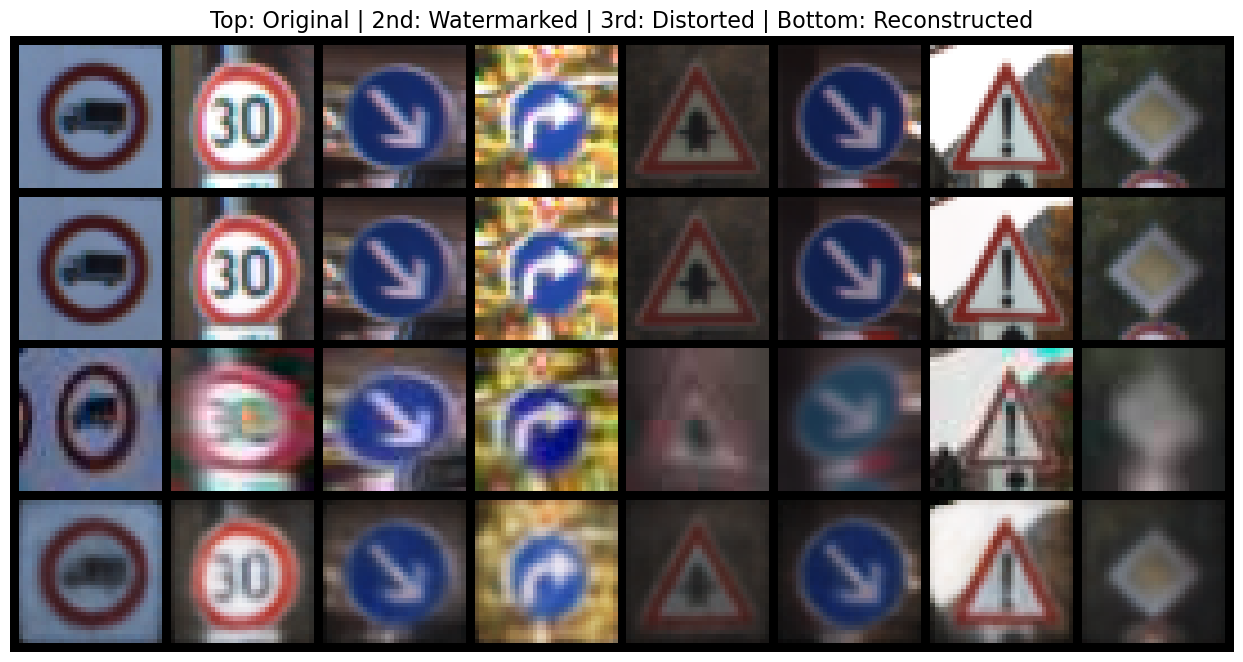

In [12]:
import importlib
import utils.inference as inference
importlib.reload(inference)
from utils.inference import evaluate_unet_watermark
evaluate_unet_watermark(test_loader, device)